In [80]:
import pandas as pd
import json
import glob

# Load the JSON file
# Read all JSON files that start with "perplexity_"
json_files = glob.glob('../perplexity_*.json')

# Combine data from all JSON files
data = []
for file in json_files:
    with open(file, 'r') as f:
        data.extend(json.load(f))

# Create a DataFrame
df = pd.DataFrame(data)

# Display the head of the DataFrame
df

,file,low_perplexity_windows,avg_perplexity
0,outputs/perplexity/wiki/output_perplexity_cybe...,[],0.820327
1,outputs/perplexity/wiki/output_perplexity_cybe...,[],0.658770
2,outputs/perplexity/wiki/output_perplexity_cybe...,[],0.713098
3,outputs/perplexity/wiki/output_perplexity_cybe...,[],0.768168
4,outputs/perplexity/wiki/output_perplexity_cybe...,[],0.825420
...,...,...,...
1803,outputs/perplexity/wiki/output_perplexity_cybe...,[{'window_text': ' idealized model of hash fun...,0.299695
1804,outputs/perplexity/wiki/output_perplexity_cybe...,[{'window_text': ' idealized model of hash fun...,0.285822
1805,outputs/perplexity/wiki/output_perplexity_cybe...,[{'window_text': ' model of hash functions tha...,0.259431
1806,outputs/perplexity/wiki/output_perplexity_cybe...,[],0.549175


In [81]:
df

,file,low_perplexity_windows,avg_perplexity
0,outputs/perplexity/wiki/output_perplexity_cybe...,[],0.820327
1,outputs/perplexity/wiki/output_perplexity_cybe...,[],0.658770
2,outputs/perplexity/wiki/output_perplexity_cybe...,[],0.713098
3,outputs/perplexity/wiki/output_perplexity_cybe...,[],0.768168
4,outputs/perplexity/wiki/output_perplexity_cybe...,[],0.825420
...,...,...,...
1803,outputs/perplexity/wiki/output_perplexity_cybe...,[{'window_text': ' idealized model of hash fun...,0.299695
1804,outputs/perplexity/wiki/output_perplexity_cybe...,[{'window_text': ' idealized model of hash fun...,0.285822
1805,outputs/perplexity/wiki/output_perplexity_cybe...,[{'window_text': ' model of hash functions tha...,0.259431
1806,outputs/perplexity/wiki/output_perplexity_cybe...,[],0.549175


In [82]:
# Extract the .../prompts_Z/.../PX_Y.txt part and create columns for X, Y, and Z
df[['Z', 'X', 'Y']] = df['file'].str.extract(r'-(\w+)_P(\d+)_(\d+)\.txt')

# Convert X and Y to integers for consistency
df['X'] = df['X'].astype(int)
df['Y'] = df['Y'].astype(int)

# Display the updated DataFrame
df

ValueError: cannot convert float NaN to integer

In [166]:
import plotly.express as px

# Create a boxplot for 'longest_low_perplexity_length' grouped by 'Z'
fig = px.box(df, x='Z', y='avg_perplexity', 
             title='Distribution of Longest Low Perplexity Length by Prefix Type',
             labels={'avg_perplexity': 'Average perplexity', 'Z': 'Prefix Type'})

# Update layout
fig.update_layout(
    title='Average Perplexity per prefix',
    xaxis_title='Prefix',
    yaxis_title='Average Perplexity',
    barmode='group',  # Group bars by X value
    legend_title='Prefix type'
)

In [167]:
import plotly.express as px

# Create a boxplot for 'longest_low_perplexity_length' grouped by 'Z'
fig = px.box(df, x='Z', y='longest_low_perplexity_length', 
             title='Distribution of Longest Low Perplexity Length by Prefix Type',
             labels={'longest_low_perplexity_length': 'Longest Low Perplexity Length', 'Z': 'Prefix Type'})

# Update layout
fig.update_layout(
    title='Longest low-perplexity length per prefix',
    xaxis_title='Prefix',
    yaxis_title='Longest low perplexity',
    barmode='group',  # Group bars by X value
    legend_title='Prefix type'
)

fig.update_xaxes(tickvals=grouped['Z'], ticktext=["According to literature, ...", "No prefixes", "According to Wikipedia, ..."])

fig.show()

(array([125.,  78.,   3.,   0.,   2.,   0.,   1.,   0.,   0.,   1.]),
 array([ 17.5570592 ,  48.85453634,  80.15201348, 111.44949062,
        142.74696777, 174.04444491, 205.34192205, 236.63939919,
        267.93687633, 299.23435347, 330.53183061]),
 <BarContainer object of 10 artists>)

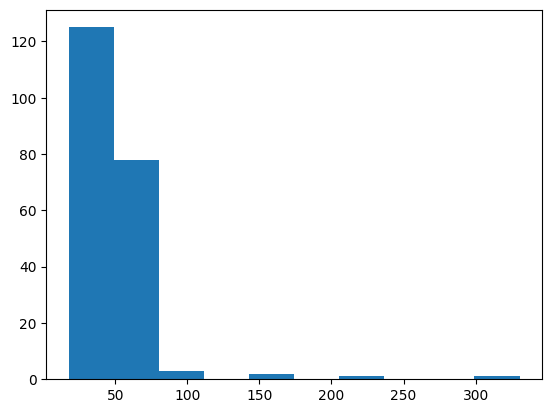

In [139]:
import matplotlib.pyplot as plt

import plotly.express as px

# Create a histogram for each value of Z
fig = px.histogram(df, x='avg_perplexity', color='Z', barmode='overlay', 
                   title='Distribution of Average Perplexity by Z',
                   labels={'avg_perplexity': 'Average Perplexity', 'Z': 'Prefix Type'})

# Show the plot
fig.show()

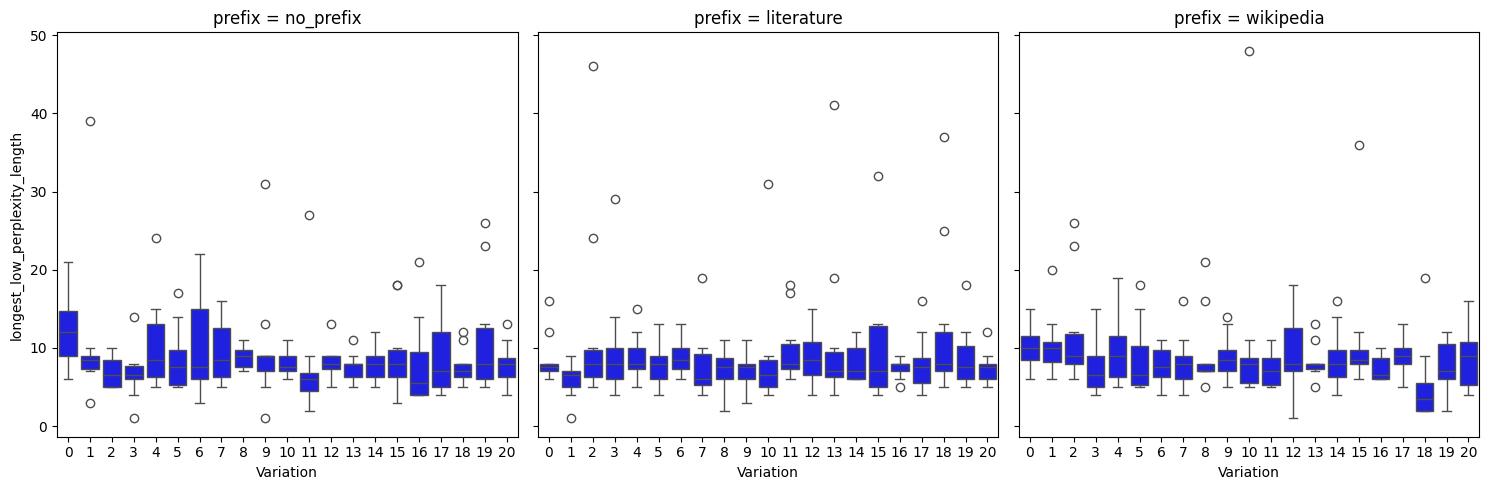

In [174]:
# Create subplots for each value of Z
fig, axes = plt.subplots(1, len(unique_z_values), figsize=(15, 5), sharey=True)

per = 'longest_low_perplexity_length' #longest_low_perplexity_length

for ax, z_value in zip(axes, unique_z_values):
    # Filter data for the current Z value
    z_data = df[df['Z'] == z_value]
    
    # Create a boxplot
    sns.boxplot(data=z_data, x='X', y=per, ax=ax, color='blue')
    
    # Add labels and title
    ax.set_title(f'prefix = {z_value}')
    ax.set_xlabel('Variation')
    ax.set_ylabel(per)

plt.tight_layout()
plt.show()


In [160]:
df.sort_values(by='longest_low_perplexity_length', ascending=False).iloc[0, 0]

'outputs/perplexity/prompts_morphine/pythia-2.8b-wikipedia_P10_1.txt'

In [24]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})  # Change 14 to your desired font size

In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import glob

# Initialize an empty list to store data from all files
all_data = []

json_file_path = 'jsons/*'  # Replace with actual path

# Function to load JSON files and extract data
for file in glob.glob(json_file_path):
    print(f"Processing: {file}")
    
    # Extract metadata from filename
    filename_parts = file.split('_')
    dataset = filename_parts[2]  # Assuming dataset is consistently at index 2
    deduped = 'deduped' in file
    
    temperature = 0.7
    if 'T0' in file:
        temperature = int(file.split('T0')[1][0]) / 10
    
    # Load the JSON file
    with open(file, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    # Extract data from each file
    for el in data:
        for item in el['low_perplexity_windows']:
            # Create a dictionary for each data point
            data_point = {
                'file': file,
                'dataset': dataset,
                'deduped': deduped,
                'infinigram_count': item['infinigram_count'],
                'perplexity': item['window_avg_perplexity'],
                'text': item['window_text'],
                'temperature': temperature,
            }
            # Add to our collection
            all_data.append(data_point)
            
    print(f"Processed {len([item for el in data for item in el['low_perplexity_windows']])} items from {file}")

# Create a pandas DataFrame from the collected data
df = pd.DataFrame(all_data)

df['infinigram_count_adj'] = df['infinigram_count'].copy()
df.loc[df['infinigram_count_adj'] == 0, 'infinigram_count_adj'] = 0.3

# Define regions based on the conditions
conditions = [
    (df['infinigram_count_adj'] > 100),
    ((df['infinigram_count_adj'] >= 0.1) & (df['infinigram_count_adj'] <= 5) & (df['perplexity'] >= 10)),
    ((df['infinigram_count_adj'] >= 0.55) & (df['infinigram_count_adj'] <= 5) & (df['perplexity'] >= 0) & (df['perplexity'] <= 10)),
    ((df['infinigram_count_adj'] >= 5) & (df['infinigram_count_adj'] <= 100) & (df['perplexity'] >= 0)),
    ((df['infinigram_count_adj'] >= 0.1) & (df['infinigram_count_adj'] <= 0.55) & (df['perplexity'] >= 0) & (df['perplexity'] <= 10))
]

categories = [
    "Frequently encountered text",
    "Degeneration",
    "Memorization",
    "Segmental replication",
    "Synthetic coherence"
]

# Add a new column for the category
df['category'] = np.select(conditions, categories, default='Other')
df_deduped = df[(df['dataset'] == 'crispr') & (df['temperature'] == 0.7)]

df_temperature = df[(df['file'] == 'jsons/perplexity_results_crispr_with_counts.json') | (df['temperature'] != 0.7)]

df = df[(df['deduped'] == False) & (df['temperature'] == 0.7)]

# Display information about the combined dataset
print("\nCombined Dataset Summary:")
print(f"Total entries: {len(df)}")
print(f"Unique datasets: {df['dataset'].unique()}")
print(f"Sample of the data:")
df

Processing: jsons/perplexity_results_crispr_T04_with_counts.json
Processed 1519 items from jsons/perplexity_results_crispr_T04_with_counts.json
Processing: jsons/perplexity_results_cyber_with_counts.json
Processed 859 items from jsons/perplexity_results_cyber_with_counts.json
Processing: jsons/perplexity_results_crispr_2_with_counts.json
Processed 1365 items from jsons/perplexity_results_crispr_2_with_counts.json
Processing: jsons/perplexity_results_nuclear_with_counts.json
Processed 1343 items from jsons/perplexity_results_nuclear_with_counts.json
Processing: jsons/perplexity_results_crispr_T03_with_counts.json
Processed 2260 items from jsons/perplexity_results_crispr_T03_with_counts.json
Processing: jsons/perplexity_results_drugs_with_counts.json
Processed 1785 items from jsons/perplexity_results_drugs_with_counts.json
Processing: jsons/perplexity_results_crispr_T06_with_counts.json
Processed 545 items from jsons/perplexity_results_crispr_T06_with_counts.json
Processing: jsons/perple

/tmp/ipykernel_61564/2997984674.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['infinigram_count_adj'] == 0, 'infinigram_count_adj'] = 0.3


,file,dataset,deduped,infinigram_count,perplexity,text,temperature,infinigram_count_adj,category
1519,jsons/perplexity_results_cyber_with_counts.json,cyber,False,160,7.682092,", integrity, and availability of information",0.7,160.0,Frequently encountered text
1520,jsons/perplexity_results_cyber_with_counts.json,cyber,False,121772831,7.227530,ρυπτός k,0.7,121772831.0,Frequently encountered text
1521,jsons/perplexity_results_cyber_with_counts.json,cyber,False,8,7.939659,"ryptos, meaning ""hidden,",0.7,8.0,Segmental replication
1522,jsons/perplexity_results_cyber_with_counts.json,cyber,False,6,8.497604,be used to ensure that messages are,0.7,6.0,Segmental replication
1523,jsons/perplexity_results_cyber_with_counts.json,cyber,False,14,7.542032,used to ensure that messages are only,0.7,14.0,Segmental replication
...,...,...,...,...,...,...,...,...,...
14875,jsons/perplexity_results_crispr_with_counts.json,crispr,False,501,10.134613,causal gene or genes.\n\n,0.7,501.0,Frequently encountered text
14876,jsons/perplexity_results_crispr_with_counts.json,crispr,False,45,7.780538,gene or genes.\n\nA,0.7,45.0,Segmental replication
14877,jsons/perplexity_results_crispr_with_counts.json,crispr,False,3435,5.592325,fruit fly Drosophila melanogaster,0.7,3435.0,Frequently encountered text
14878,jsons/perplexity_results_crispr_with_counts.json,crispr,False,9252,6.645049,"fly Drosophila melanogaster,",0.7,9252.0,Frequently encountered text


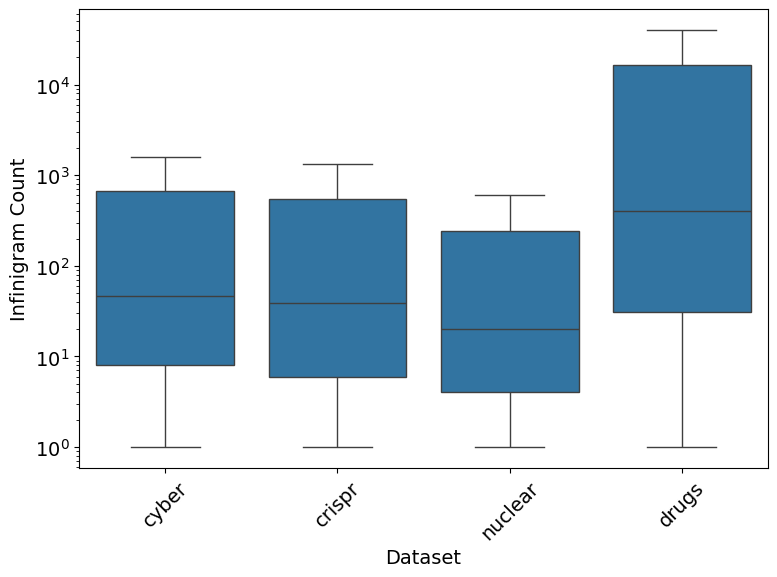

In [288]:
import seaborn as sns

# Create a figure with boxplots for each dataset and deduped combination
plt.figure(figsize=(8, 6))

# Create a boxplot for 'infinigram_count' grouped by 'dataset' and 'deduped'
sns.boxplot(data=df[(df['deduped'] == False) & (df['infinigram_count'] > 0)], x='dataset', y='infinigram_count', showfliers=False)

# Add labels and title
plt.xlabel('Dataset')
plt.ylabel('Infinigram Count')

plt.yscale('log')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_8411/527704915.py:78: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



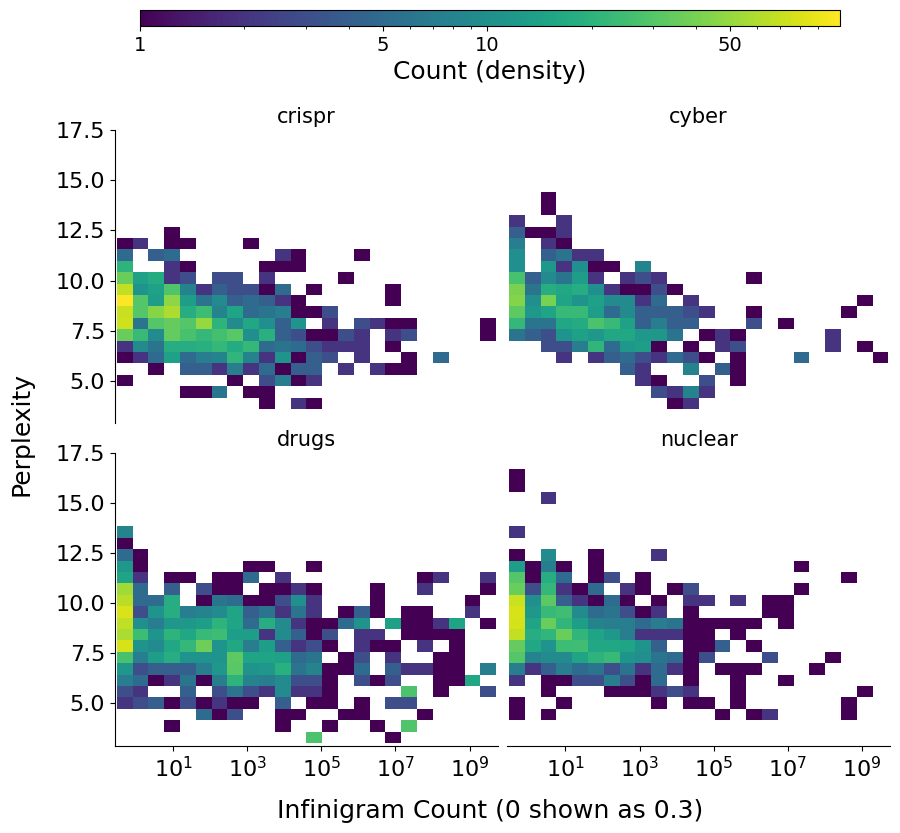

In [289]:

# Get unique datasets
datasets = df.groupby('dataset')
n_datasets = len(datasets)

# Determine global min and max for consistent scales
perp_min = df['perplexity'].min()
perp_max = df['perplexity'].max()
inf_min = df['infinigram_count_adj'].min()
inf_max = df['infinigram_count_adj'].max()

fig = plt.figure(figsize=(10, 8))
gs = GridSpec(2, 2, figure=fig, wspace=0.025, hspace=0.1)

# Define consistent bins for histograms
x_bins = np.logspace(np.log10(inf_min), np.log10(max(inf_max, 1000)), 25)
y_bins = np.linspace(perp_min, perp_max, 25)

# Define consistent colormap and normalization for all plots
cmap = plt.cm.viridis
norm = colors.LogNorm()  # Use log normalization for the colormap

# Create all plots
for i, (dataset_name, dataset_df) in enumerate(datasets):
    row, col = i // 2, i % 2
    ax = fig.add_subplot(gs[row, col])
    
    # ax.set_facecolor(cmap(0))
    
    # Create 2D histogram
    h, xedges, yedges, img = ax.hist2d(
        dataset_df['infinigram_count_adj'],
        dataset_df['perplexity'],
        bins=[x_bins, y_bins],
        cmap=cmap,
        norm=norm,
        cmin=.1
    )
    
    # Configure axis scales
    ax.set_xscale('log')
    
    # Set consistent axis limits
    ax.set_xlim(inf_min * 0.9, inf_max * 1.1)
    ax.set_ylim(perp_min * 0.95, perp_max * 1.05)
    
    # Make only bottom x-axis and left y-axis visible
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    if row == 0:
        ax.spines['bottom'].set_visible(False)
        ax.xaxis.set_ticks([])
    if col == 1:
        ax.spines['left'].set_visible(False)
        ax.yaxis.set_ticks([])
        
    # Set axis label font sizes
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    
    # Add subtle title with dataset name
    ax.set_title(dataset_name, fontsize=15, color='black', pad=5)

# Add a colorbar at the top that applies to all subplots
cbar_ax = fig.add_axes([0.15, 1.01, 0.7, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(img, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Count (density)', fontsize=18)
cbar.set_ticks([1, 5, 10, 50])
cbar.set_ticklabels(['1', '5', '10', '50'])

# Add centered x-axis label for both columns
fig.text(0.5, 0.02, 'Infinigram Count (0 shown as 0.3)', ha='center', fontsize=18)

# Add centered y-axis label for both rows
fig.text(0.02, 0.5, 'Perplexity', va='center', rotation='vertical', fontsize=18)

# Adjust layout for better spacing
plt.tight_layout(rect=[0.05, 0.05, 1, 0.9])  # [left, bottom, right, top]

plt.savefig('../images/scatter_subplots.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_8411/3073161426.py:78: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



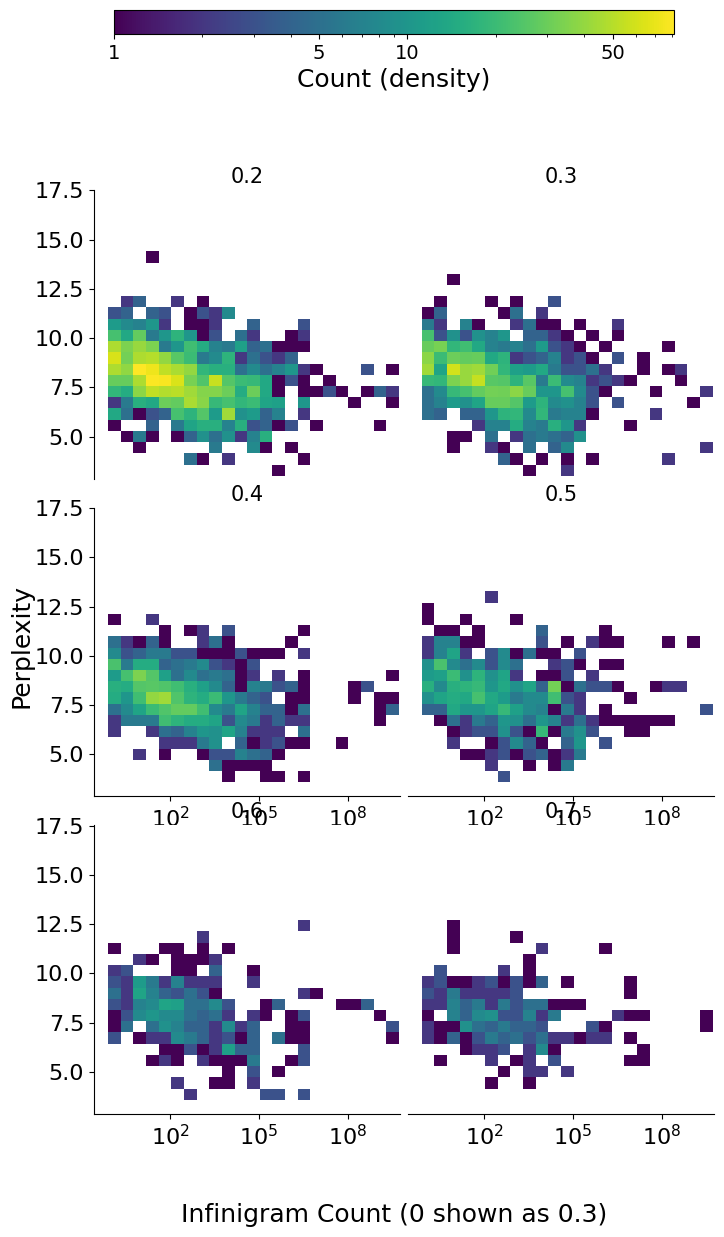

In [302]:

# Get unique datasets
datasets = df_temperature.groupby('temperature')
n_datasets = len(datasets)

# Determine global min and max for consistent scales
perp_min = df['perplexity'].min()
perp_max = df['perplexity'].max()
inf_min = df['infinigram_count_adj'].min()
inf_max = df['infinigram_count_adj'].max()

fig = plt.figure(figsize=(8, 12))
gs = GridSpec(3, 2, figure=fig, wspace=0.025, hspace=0.1)

# Define consistent bins for histograms
x_bins = np.logspace(np.log10(inf_min), np.log10(max(inf_max, 1000)), 25)
y_bins = np.linspace(perp_min, perp_max, 25)

# Define consistent colormap and normalization for all plots
cmap = plt.cm.viridis
norm = colors.LogNorm()  # Use log normalization for the colormap

# Create all plots
for i, (dataset_name, dataset_df) in enumerate(datasets):
    row, col = i // 2, i % 2
    ax = fig.add_subplot(gs[row, col])
    
    # ax.set_facecolor(cmap(0))
    
    # Create 2D histogram
    h, xedges, yedges, img = ax.hist2d(
        dataset_df['infinigram_count'],
        dataset_df['perplexity'],
        bins=[x_bins, y_bins],
        cmap=cmap,
        norm=norm,
        cmin=.1
    )
    
    # Configure axis scales
    ax.set_xscale('log')
    
    # Set consistent axis limits
    ax.set_xlim(inf_min * 0.9, inf_max * 1.1)
    ax.set_ylim(perp_min * 0.95, perp_max * 1.05)
    
    # Make only bottom x-axis and left y-axis visible
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    if row == 0:
        ax.spines['bottom'].set_visible(False)
        ax.xaxis.set_ticks([])
    if col == 1:
        ax.spines['left'].set_visible(False)
        ax.yaxis.set_ticks([])
        
    # Set axis label font sizes
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    
    # Add subtle title with dataset name
    ax.set_title(dataset_name, fontsize=15, color='black', pad=5)

# Add a colorbar at the top that applies to all subplots
cbar_ax = fig.add_axes([0.15, 1.01, 0.7, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(img, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Count (density)', fontsize=18)
cbar.set_ticks([1, 5, 10, 50])
cbar.set_ticklabels(['1', '5', '10', '50'])

# Add centered x-axis label for both columns
fig.text(0.5, 0.02, 'Infinigram Count (0 shown as 0.3)', ha='center', fontsize=18)

# Add centered y-axis label for both rows
fig.text(0.02, 0.5, 'Perplexity', va='center', rotation='vertical', fontsize=18)

# Adjust layout for better spacing
plt.tight_layout(rect=[0.05, 0.05, 1, 0.9])  # [left, bottom, right, top]

plt.savefig('../images/scatter_subplots.png', dpi=300, bbox_inches='tight')
plt.show()

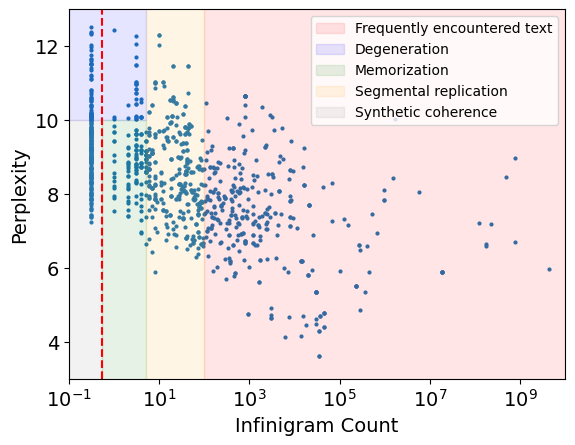

{'Frequently encountered text': 0.3254670599803343,
 'Segmental replication': 0.3166175024582104,
 'Synthetic coherence': 0.14847590953785644,
 'Memorization': 0.12094395280235988,
 'Degeneration': 0.08849557522123894}

In [303]:
# Filter the DataFrame for the "cyber" dataset

dataset = 'cyber'
dataset_df = df[df['dataset'] == dataset]

# Create a scatter plot
fig = plt.scatter(dataset_df['infinigram_count_adj'], dataset_df['perplexity'], s=4)
plt.axvline(x=.55, color='r', linestyle='--')

# Color region where count > 1000
plt.fill_betweenx([0, 15], 100, 10000000000, color='red', alpha=0.1, label='Frequently encountered text')
plt.fill_betweenx([10, 15], 0.1, 5, color='blue', alpha=0.1, label='Degeneration')
plt.fill_betweenx([0, 10], 0.55, 5, color='green', alpha=0.1, label='Memorization')
plt.fill_betweenx([0, 15], 5, 100, color='orange', alpha=0.1, label='Segmental replication')
plt.fill_betweenx([0, 10], 0.1, 0.55, color='gray', alpha=0.1, label='Synthetic coherence')

plt.legend(fontsize=10)

plt.xlabel('Infinigram Count')
plt.ylabel('Perplexity')

plt.xlim(0.1, 1e10)
plt.ylim(3, 13)

plt.xscale('log')

plt.savefig(f'../images/{dataset}_scatter.png', dpi=300, bbox_inches='tight')

plt.show()

# Calculate the counts for each category
region_counts = dataset_df['category'].value_counts(normalize=True).to_dict()

# Display the counts
region_counts

In [304]:
# Randomly sample one row from each category
sampled_rows = cyber_df.groupby('category').apply(lambda x: x.sample(3)).reset_index(drop=True)

# Display the sampled rows
print(sampled_rows[['text', 'category']].to_latex(index=False))

\begin{tabular}{ll}
\toprule
text & category \\
\midrule
 that the exchanged keys are computationally & Degeneration \\
 applications attract a large amount of crypt & Degeneration \\
 applications attract a large amount of crypt & Degeneration \\
 the private key is kept secret. & Frequently encountered text \\
 to create, manage, distribute, & Frequently encountered text \\
 then use this information to determine the & Frequently encountered text \\
 protect communications and data stored on computer & Memorization \\
. Standard algorithms and protocols provide a & Memorization \\
 the more secure the cryptosystem & Memorization \\
 a pseudorandom cipher digit stream & Segmental replication \\
 a brute-force attack. The & Segmental replication \\
 data of arbitrary size to a bit & Segmental replication \\
 include a software module for performing a & Synthetic coherence \\
s to ciphertexts, the & Synthetic coherence \\
, use, store, and rev & Synthetic coherence \\
\bottomrule
\end{t

/tmp/ipykernel_8411/4217236307.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [305]:
result = df.groupby('dataset').agg(
    avg_perplexity=('perplexity', 'mean'),
    total_low_perplexity_regions=('perplexity', 'count'),
    non_zero_counts=('infinigram_count', lambda x: (x > 0).sum())
)

# Calculate percentage of non-zero counts
result['non_zero_percent'] = (result['non_zero_counts'] / result['total_low_perplexity_regions'] * 100).round(2)

# Reset index to make dataset a column
result = result.reset_index()

# Set float format to 2 significant digits
print(result.to_latex(index=False, float_format="%.2f"))

\begin{tabular}{lrrrr}
\toprule
dataset & avg_perplexity & total_low_perplexity_regions & non_zero_counts & non_zero_percent \\
\midrule
crispr & 8.06 & 1701 & 1285 & 75.54 \\
cyber & 8.47 & 1017 & 811 & 79.74 \\
drugs & 8.11 & 1785 & 1292 & 72.38 \\
nuclear & 8.83 & 1343 & 887 & 66.05 \\
\bottomrule
\end{tabular}



In [306]:
result = df.groupby(['category', 'dataset']).agg(
    total_low_perplexity_regions=('perplexity', 'count')).reset_index('category')

# Reset index to make dataset a column
result = result.reset_index()
result = result.pivot(index='dataset', columns='category', values='total_low_perplexity_regions')
result.columns.name = None
result = result.div(result.sum(axis=1), axis=0) * 100
result

# Set float format to 2 significant digits
print(result.to_latex(index=True, float_format="%.2g"))

\begin{tabular}{lrrrrr}
\toprule
 & Degeneration & Frequently encountered text & Memorization & Segmental replication & Synthetic coherence \\
dataset &  &  &  &  &  \\
\midrule
crispr & 4.5 & 31 & 14 & 29 & 22 \\
cyber & 8.8 & 33 & 12 & 32 & 15 \\
drugs & 8.5 & 47 & 7.2 & 17 & 20 \\
nuclear & 17 & 22 & 14 & 23 & 24 \\
\bottomrule
\end{tabular}



In [307]:
result = df_temperature.groupby(['category', 'temperature']).agg(
    total_low_perplexity_regions=('perplexity', 'count')).reset_index('category')

# Reset index to make dataset a column
result = result.reset_index()
result = result.pivot(index='temperature', columns='category', values='total_low_perplexity_regions')
result.columns.name = None
result = result.div(result.sum(axis=1), axis=0) * 100
result

# Set float format to 2 significant digits
print(result.to_latex(index=True, float_format="%.2g"))

\begin{tabular}{lrrrrr}
\toprule
 & Degeneration & Frequently encountered text & Memorization & Segmental replication & Synthetic coherence \\
temperature &  &  &  &  &  \\
\midrule
0.200000 & 6.7 & 41 & 11 & 25 & 17 \\
0.300000 & 5.7 & 44 & 12 & 24 & 15 \\
0.400000 & 6.5 & 43 & 9.4 & 26 & 15 \\
0.500000 & 7.1 & 44 & 9.4 & 20 & 19 \\
0.600000 & 3.7 & 49 & 5.5 & 23 & 19 \\
0.700000 & 3.3 & 55 & 6.5 & 23 & 12 \\
\bottomrule
\end{tabular}



In [308]:
result = df_temperature.groupby('temperature').agg(
    avg_perplexity=('perplexity', 'mean'),
    total_low_perplexity_regions=('perplexity', 'count'),
    non_zero_counts=('infinigram_count', lambda x: (x > 0).sum())
)

# Calculate percentage of non-zero counts
result['non_zero_percent'] = (result['non_zero_counts'] / result['total_low_perplexity_regions'] * 100).round(2)

# Reset index to make dataset a column
result = result.reset_index()

# Set float format to 2 significant digits
print(result.to_latex(index=False, float_format="%.2f"))

\begin{tabular}{rrrrr}
\toprule
temperature & avg_perplexity & total_low_perplexity_regions & non_zero_counts & non_zero_percent \\
\midrule
0.20 & 8.19 & 3660 & 2864 & 78.25 \\
0.30 & 8.12 & 2260 & 1820 & 80.53 \\
0.40 & 8.14 & 1519 & 1208 & 79.53 \\
0.50 & 8.24 & 1208 & 911 & 75.41 \\
0.60 & 7.93 & 545 & 428 & 78.53 \\
0.70 & 7.97 & 336 & 288 & 85.71 \\
\bottomrule
\end{tabular}



In [309]:
import plotly.express as px

# Filter the DataFrame for the "cyber" dataset
cyber_df = df[df['dataset'] == 'cyber']

# Create a scatter plot
fig = px.scatter(cyber_df, x='infinigram_count_adj', y='perplexity', color='deduped',
                 title='Scatter Plot of Infinigram Count vs Perplexity for Cyber Dataset',
                 labels={'infinigram_count': 'Infinigram Count', 'perplexity': 'Perplexity'},
                 hover_data=['text'])

fig.update_xaxes(type='log')

# Show the plot
fig.show()

In [14]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import glob

# Initialize an empty list to store data from all files
all_data = []
json_file_path = 'jsons/*'  # Replace with actual path

# Function to load JSON files and extract data
for file in glob.glob(json_file_path):
    print(f"Processing: {file}")
    # Extract metadata from filename
    filename_parts = file.split('_')
    dataset = filename_parts[2]  # Assuming dataset is consistently at index 2
    deduped = 'deduped' in file
    
    if 'deduped' in file or 'T0' in file:
        continue
    
    # Load the JSON file
    with open(file, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    # Extract data from each file while preserving order
    file_data = []
    for el in data:
        # Keep list of items in each element to preserve original order
        element_items = []
        for item in el['low_perplexity_windows']:
            # Create a dictionary for each data point
            data_point = {
                'dataset': dataset,
                'deduped': deduped,
                'infinigram_count': item['infinigram_count'],
                'perplexity': item['window_avg_perplexity'],
                'text': item['window_text'],
                'tokens': item.get('infinigram_tokens', [])
            }
            element_items.append(data_point)
        
        # Add contiguity information
        for i in range(len(element_items) - 1):
            # We'll mark items as contiguous in the next step
            # Also store the index of the next item for easy reference
            element_items[i]['next_index'] = i + 1
        
        # Add the last item without a next_index
        if element_items:
            element_items[-1]['next_index'] = -1
        
        # Add all items from this element to our collection
        file_data.extend(element_items)
    
    # Now determine contiguity between items in this file
    for i in range(len(file_data) - 1):
        # Skip if this is the last item in an element
        if file_data[i]['next_index'] == -1:
            file_data[i]['is_contiguous'] = False
            continue
        
        # Check if there's substring overlap between current and next item
        current_text = file_data[i]['text']
        next_text = file_data[i+1]['text']
        
        # Function to check for substring overlap
        def has_substring_overlap(text1, text2, min_overlap=3):
            # Try different overlap lengths
            for overlap_len in range(min(len(text1), len(text2)), min_overlap-1, -1):
                # Check if end of text1 matches start of text2
                if text1[-overlap_len:] == text2[:overlap_len]:
                    return True
            return False
        
        # Alternatively, check token overlap
        current_tokens = set(file_data[i]['tokens'])
        next_tokens = set(file_data[i+1]['tokens'])
        token_overlap = len(current_tokens.intersection(next_tokens))
        
        # Mark as contiguous if there's significant substring or token overlap
        is_contiguous = has_substring_overlap(current_text, next_text, 3) or token_overlap >= 2
        file_data[i]['is_contiguous'] = is_contiguous
    
    # Add last item as not contiguous
    if file_data:
        file_data[-1]['is_contiguous'] = False
    
    all_data.extend(file_data)
    print(f"Processed {len(file_data)} items from {file}")

df = pd.DataFrame(all_data)

df['infinigram_count_adj'] = df['infinigram_count'].copy()
df.loc[df['infinigram_count_adj'] == 0, 'infinigram_count_adj'] = 0.3

conditions = [
    (df['infinigram_count_adj'] > 100),
    ((df['infinigram_count_adj'] >= 0.1) & (df['infinigram_count_adj'] <= 5) & (df['perplexity'] >= 10)),
    ((df['infinigram_count_adj'] >= 0.55) & (df['infinigram_count_adj'] <= 5) & (df['perplexity'] >= 0) & (df['perplexity'] <= 10)),
    ((df['infinigram_count_adj'] >= 5) & (df['infinigram_count_adj'] <= 100) & (df['perplexity'] >= 0)),
    ((df['infinigram_count_adj'] >= 0.1) & (df['infinigram_count_adj'] <= 0.55) & (df['perplexity'] >= 0) & (df['perplexity'] <= 10))
]

categories = [
    "Frequently encountered text",
    "Degeneration",
    "Memorization",
    "Segmental replication",
    "Synthetic coherence"
]

# Create a pandas DataFrame from the collected data
df['category'] = np.select(conditions, categories, default='Other')

# Display information about the combined dataset
print("\nCombined Dataset Summary:")
print(f"Total entries: {len(df)}")
print(f"Unique datasets: {df['dataset'].unique()}")


Processing: jsons/perplexity_results_crispr_T04_with_counts.json
Processing: jsons/perplexity_results_cyber_with_counts.json
Processed 859 items from jsons/perplexity_results_cyber_with_counts.json
Processing: jsons/perplexity_results_crispr_2_with_counts.json
Processed 1365 items from jsons/perplexity_results_crispr_2_with_counts.json
Processing: jsons/perplexity_results_nuclear_with_counts.json
Processed 1343 items from jsons/perplexity_results_nuclear_with_counts.json
Processing: jsons/perplexity_results_crispr_T03_with_counts.json
Processing: jsons/perplexity_results_drugs_with_counts.json
Processed 1785 items from jsons/perplexity_results_drugs_with_counts.json
Processing: jsons/perplexity_results_crispr_T06_with_counts.json
Processing: jsons/perplexity_results_cyber_2_with_counts.json
Processed 158 items from jsons/perplexity_results_cyber_2_with_counts.json
Processing: jsons/perplexity_results_crispr_deduped_with_counts.json
Processing: jsons/perplexity_results_crispr_T02_with_c

/tmp/ipykernel_61564/3122408488.py:96: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['infinigram_count_adj'] == 0, 'infinigram_count_adj'] = 0.3


In [9]:
print(df.head())

  dataset  deduped  infinigram_count  perplexity  \
0   cyber    False               160    7.682092   
1   cyber    False         121772831    7.227530   
2   cyber    False                 8    7.939659   
3   cyber    False                 6    8.497604   
4   cyber    False                14    7.542032   

                                           text  \
0  , integrity, and availability of information   
1                                      ρυπτός k   
2                      ryptos, meaning "hidden,   
3           be used to ensure that messages are   
4         used to ensure that messages are only   

                                              tokens  next_index  \
0  [▁integrity, ,, ▁and, ▁avail, ability, ▁of, ▁i...          -1   
1                                               [▁k]           1   
2                          [▁meaning, ▁", hidden, ,]          -1   
3      [▁used, ▁to, ▁ensure, ▁that, ▁messages, ▁are]           1   
4      [▁to, ▁ensure, ▁that, ▁messages, 

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x734e3742e2a0>>
Traceback (most recent call last):
  File "/home/pilgrim/miniconda3/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


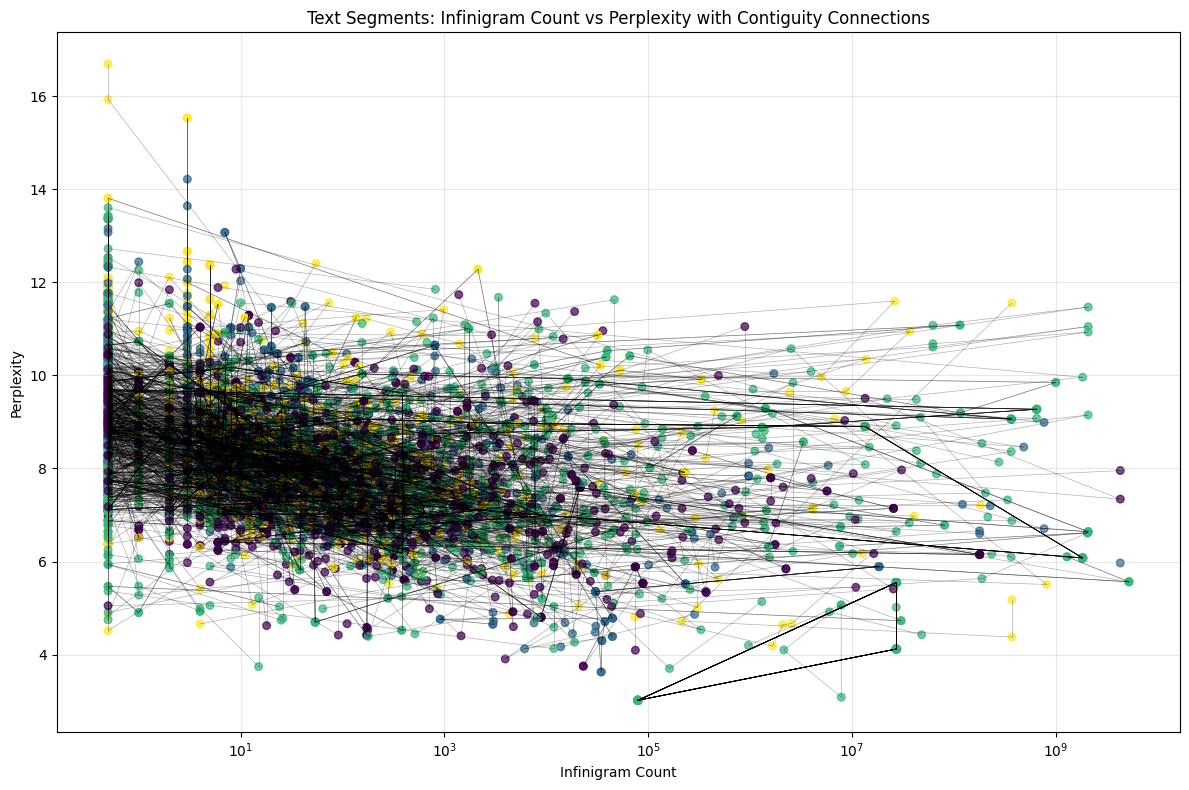

In [ ]:
df_interest = df[df['dataset'] == 'math']
df_interest = df
# change count from 0 to 0.5 for log scale
df_interest['infinigram_count'] = df_interest['infinigram_count'].replace(0, 0.5)

df_interest.reset_index(drop=True, inplace=True)

# Create a scatter plot with connections between contiguous items
plt.figure(figsize=(12, 8))


# Plot all points
scatter = plt.scatter(
    df_interest['infinigram_count'], 
    df_interest['perplexity'],
    alpha=0.7, 
    c=df_interest['dataset'].astype('category').cat.codes,  # Color by dataset
    cmap='viridis',
    s=30  # Point size
)

# Add connections between contiguous segments
for i, row in df_interest.iterrows():
    if row['is_contiguous'] and i < len(df_interest) - 1:
        # Draw a line between this point and the next
        plt.plot(
            [row['infinigram_count'], df_interest.iloc[i+1]['infinigram_count']], 
            [row['perplexity'], df_interest.iloc[i+1]['perplexity']], 
            'k-',  # Black line
            alpha=0.3,  # Make it somewhat transparent
            linewidth=0.5  # Thin line
        )

# Set plot labels and title
plt.xlabel('Infinigram Count')
plt.ylabel('Perplexity')
plt.title('Text Segments: Infinigram Count vs Perplexity with Contiguity Connections')

# Add a grid for better readability
plt.grid(True, alpha=0.3)

# Use logarithmic scale for x-axis since infinigram_count varies widely
plt.xscale('log')

# Show the plot
plt.tight_layout()
plt.savefig('contiguous_segments_plot.png', dpi=300)
plt.show()

# Optional: Create a more detailed visualization focusing on contiguous segments
# Group by dataset and visualize each separately
for dataset_name, group in df_interest.groupby('dataset'):
    plt.figure(figsize=(10, 6))
    
    # Plot all points in this dataset
    plt.scatter(
        group['infinigram_count'], 
        group['perplexity'],
        alpha=0.7,
        label=dataset_name,
        s=30
    )
    plt.xscale('log')
    
    # Add connections between contiguous segments
    connections_count = 0
    for i, row in group.iterrows():
        if row['is_contiguous'] and i < len(df_interest) - 1 and i+1 in group.index:
            # Draw a line between this point and the next
            # if abs(np.log(row['infinigram_count']) - np.log(df_interest.loc[i+1, 'infinigram_count'])) > 0.3:
                # continue
            plt.plot(
                [row['infinigram_count'], df_interest.loc[i+1, 'infinigram_count']], 
                [row['perplexity'], df_interest.loc[i+1, 'perplexity']], 
                'k-',
                alpha=0.4,
                linewidth=0.7
            )
            connections_count += 1
    
    # Set plot labels and title
    plt.xlabel('Infinigram Count')
    plt.ylabel('Perplexity')
    plt.title(f'Dataset: {dataset_name} - {connections_count} Contiguous Connections')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'contiguous_segments_{dataset_name}.png', dpi=300)
    plt.show()

In [120]:
df_interest[df_interest['is_contiguous'] == True]

,dataset,deduped,infinigram_count,perplexity,text,tokens,next_index,is_contiguous
3,cyber,False,6.0,8.497604,be used to ensure that messages are,"[▁used, ▁to, ▁ensure, ▁that, ▁messages, ▁are]",1,True
7,cyber,False,34.0,8.119696,receiver uses the same key to dec,"[▁uses, ▁the, ▁same, ▁key, ▁to, ▁dec]",1,True
8,cyber,False,122.0,6.313290,uses the same key to decrypt,"[▁the, ▁same, ▁key, ▁to, ▁dec, rypt]",2,True
9,cyber,False,47.0,8.887592,the same key to decrypt the,"[▁same, ▁key, ▁to, ▁dec, rypt, ▁the]",3,True
10,cyber,False,623.0,8.572116,same key to decrypt the message,"[▁key, ▁to, ▁dec, rypt, ▁the, ▁message]",4,True
...,...,...,...,...,...,...,...,...
6888,crispr,False,27113.0,5.575808,wide association studies (GWAS),"[▁association, ▁studies, ▁(, G, W, AS, )]",1,True
6890,crispr,False,5.0,10.285876,the causal gene or genes.\n,"[▁caus, al, ▁gene, ▁or, ▁gen, es, .]",3,True
6891,crispr,False,501.0,10.134613,causal gene or genes.\n\n,"[▁gene, ▁or, ▁gen, es, .]",4,True
6893,crispr,False,3435.0,5.592325,fruit fly Drosophila melanogaster,"[▁fly, ▁D, ros, oph, ila, ▁mel, an, og, aster]",1,True


[[0.00000000e+00 3.76700000e+02 6.00000000e-01 2.00400000e+02
  4.57000000e+01]
 [0.00000000e+00 5.05952003e+10 2.53041268e+08 3.84756042e+10
  3.45451725e+09]
 [0.00000000e+00 9.68000000e+02 5.00000000e+00 7.53000000e+02
  1.48000000e+02]
 [0.00000000e+00 1.98980000e+04 1.94000000e+02 1.72170000e+04
  2.22400000e+03]
 [0.00000000e+00 1.74000000e+02 1.50000000e+00 1.42800000e+02
  2.49000000e+01]]


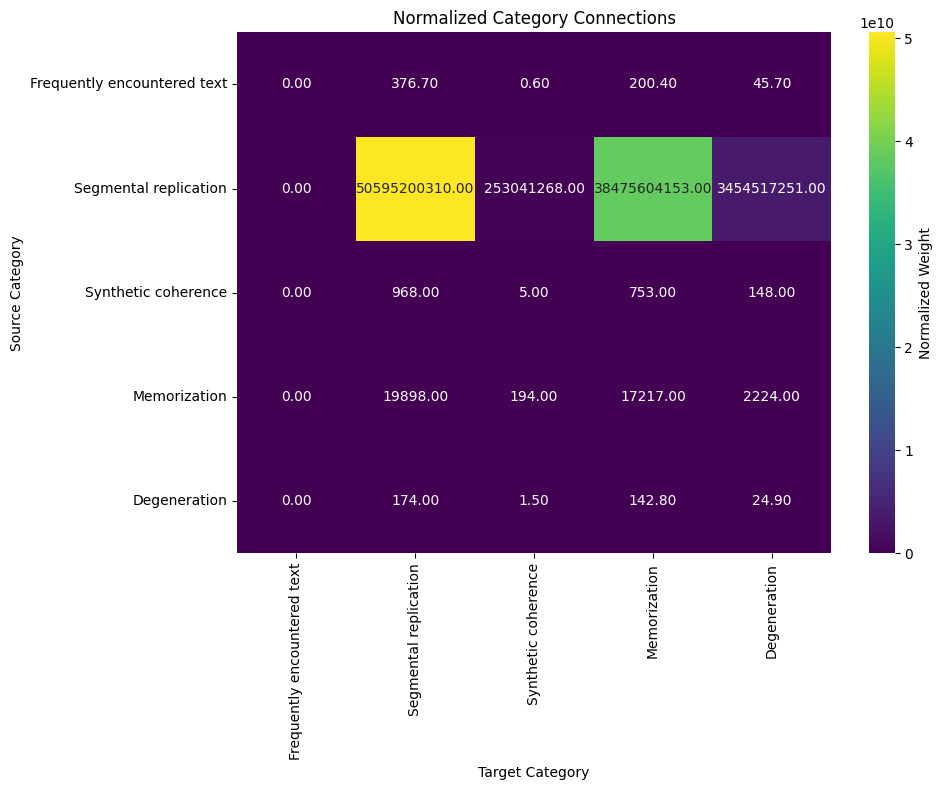

In [25]:
import seaborn as sns

unique_categories = df['category'].unique()

# Initialize variables
num_categories = len(unique_categories)
matrix = np.zeros((num_categories, num_categories))

for i, row in df.iterrows():
    next_idx = row['next_index']
    if next_idx != -1 and next_idx < len(df):
        source_cat = row['category']
        target_cat = df.iloc[next_idx]['category']
        source_idx = category_to_index[source_cat]
        target_idx = category_to_index[target_cat]
        matrix[source_idx, target_idx] += 1 # row['infinigram_count_adj']

matrix_df = pd.DataFrame(matrix, index=unique_categories, columns=unique_categories)

print(matrix)

# Normalize the matrix per row
normalized_matrix = matrix

# Convert the normalized matrix to a DataFrame
normalized_matrix_df = pd.DataFrame(normalized_matrix, index=unique_categories, columns=unique_categories)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(normalized_matrix_df, annot=True, fmt=".2f", cmap="viridis", cbar_kws={'label': 'Normalized Weight'})
plt.title("Normalized Category Connections")
plt.xlabel("Target Category")
plt.ylabel("Source Category")
plt.tight_layout()
plt.show()